# Visualizing Colors


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

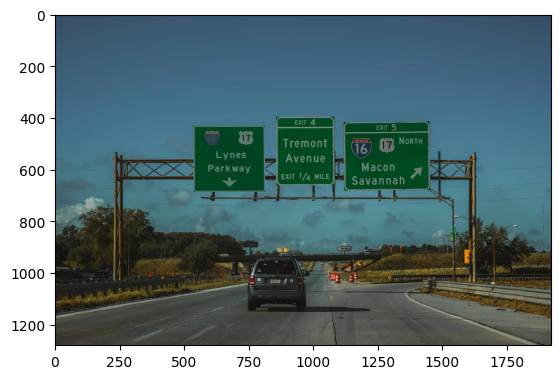

In [2]:
# Read in the image
image = mpimg.imread('data/highway.png')

plt.imshow(image)

## RGB channels

Visualize the levels of each color channel. Pay close attention to the traffic signs!


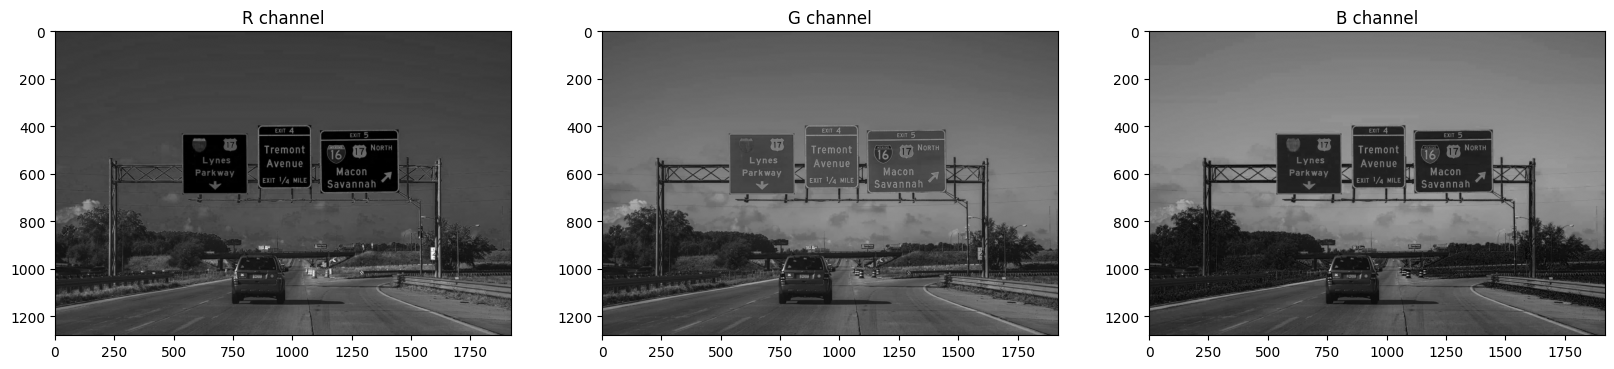

In [3]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## Which area has the lowest value for red? What about for blue?

## Color Threshold


In [4]:
import numpy as np
import cv2

In [5]:
pizza = cv2.imread('data/pizza.png')

type(pizza), pizza.shape

(numpy.ndarray, (334, 533, 3))

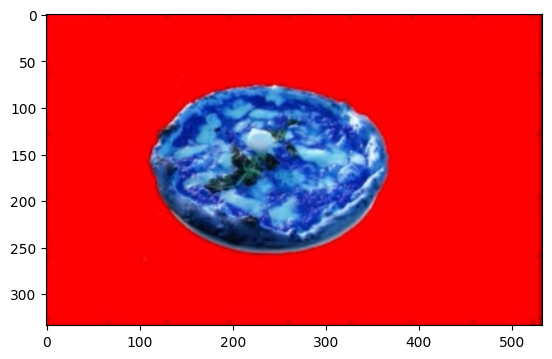

In [6]:
plt.imshow(pizza)

OpenCV uses "BGR" color format: blue, green, red


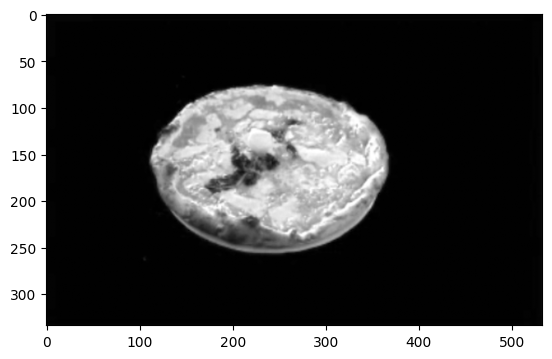

In [7]:
# Isolate the red channel
red_channel = pizza[:,:,2]
plt.imshow(red_channel, cmap='gray')

Convert to "RGB"


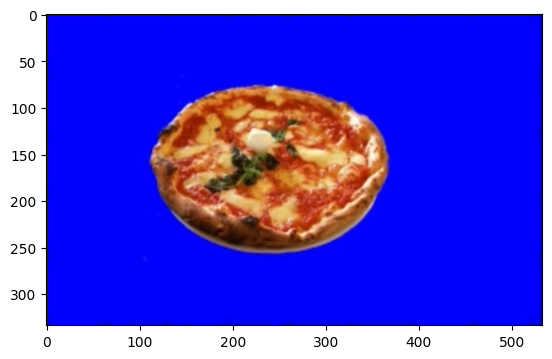

In [8]:
pizza_rgb = cv2.cvtColor(pizza, cv2.COLOR_BGR2RGB)
plt.imshow(pizza_rgb)
plt.show()

## Define the color threshold & mask


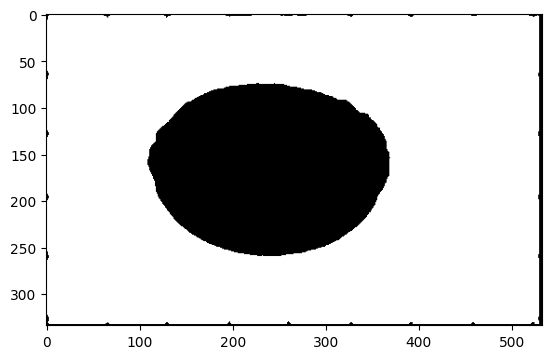

In [9]:
# Define our color selection criteria
lower_blue = np.array([0,0,220])
upper_blue = np.array([70,70,255])

# Create a mask
mask = cv2.inRange(pizza_rgb, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

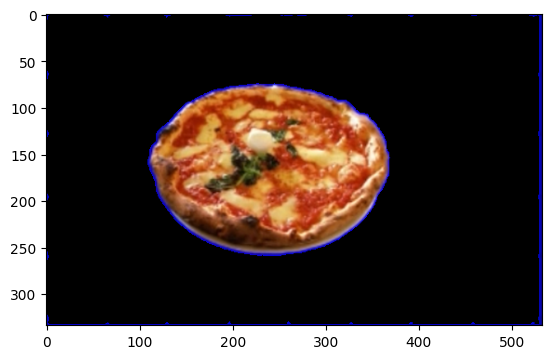

In [10]:
# mask the image to let the pizza show through
masked_image = np.copy(pizza_rgb)
masked_image[mask != 0] = [0, 0 ,0]

# Display the results
plt.imshow(masked_image)

## Mask and add a background image


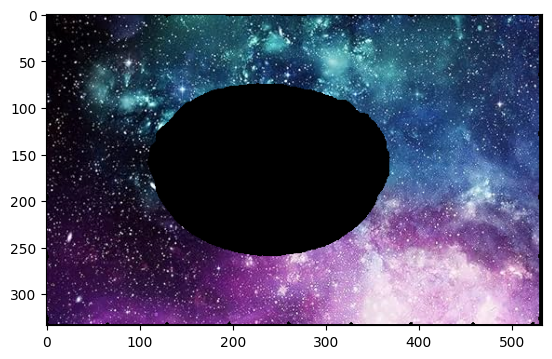

In [ ]:
# load image and convert to RGB
space = cv2.imread('data/space.jpg')
space = cv2.cvtColor(space, cv2.COLOR_BGR2RGB)

# cropt it to the size of the pizza image
crop_background = space[0:pizza.shape[0], 0:pizza.shape[1]]

# mask the cropped background so that the pizza area is blocked
crop_background = crop_background.copy()
crop_background[mask == 0] = [0,0,0]

plt.imshow(crop_background)

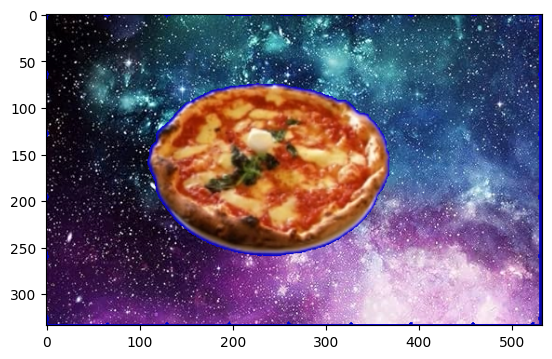

In [12]:
# add the pizza image to the background
complete_image = crop_background + masked_image

plt.imshow(complete_image)
